In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/measurements.csv')
df1 = pd.read_excel('data/measurements2.xlsx')

# Data exploration


In [3]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
df.shape

(388, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0


In [7]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [8]:
df['gas_type'].unique()

array(['E10', 'SP98'], dtype=object)

In [9]:
df.loc[df['specials'].isnull() == False]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
40,"12,4",4,55,"21,5",7,AC rain,E10,1,1,0,NaN,NaN
41,"4,5",5,29,"21,5",7,AC,E10,1,0,0,NaN,NaN
50,"11,8","5,1",29,"21,5",5,rain,SP98,0,1,0,NaN,NaN
53,"13,1","6,1",46,"21,5",6,rain,SP98,0,1,0,NaN,NaN
55,"153,5","4,9",82,"21,5",3,rain,SP98,0,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
381,"5,5","3,7",33,"24,5",28,sun,SP98,0,0,1,NaN,NaN
382,"13,6","3,7",33,"24,5",28,sun,SP98,0,0,1,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [10]:
df = df.drop(['specials', 'refill gas', 'refill liters', 'AC', 'rain', 'sun'], axis = 1)

In [11]:
df = df.dropna(subset=['temp_inside'])


In [12]:
df['temp_inside'].unique()

array(['21,5', '22,5', '20', '21', '20,5', '23', '23,5', '25', '24', '22',
       '19', '24,5', '25,5'], dtype=object)

In [13]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type
0,28,5,26,"21,5",12,E10
1,12,"4,2",30,"21,5",13,E10
2,"11,2","5,5",38,"21,5",15,E10
3,"12,9","3,9",36,"21,5",14,E10
4,"18,5","4,5",46,"21,5",15,E10


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      376 non-null    object
 1   consume       376 non-null    object
 2   speed         376 non-null    int64 
 3   temp_inside   376 non-null    object
 4   temp_outside  376 non-null    int64 
 5   gas_type      376 non-null    object
dtypes: int64(2), object(4)
memory usage: 20.6+ KB


In [15]:
# Reemplazar la coma por punto y convertir a float
df["distance"] = df["distance"].str.replace(",", ".").astype(float)
df["consume"] = df["consume"].str.replace(",", ".").astype(float)
df["temp_inside"] = df["temp_inside"].str.replace(",", ".").astype(float)
df["temp_outside"] = pd.to_numeric(df["temp_outside"])

In [16]:
# Agrupar los datos por tipo de gasolina y calcular la media del consumo de combustible
gasoline_efficiency = df.groupby('gas_type')['consume'].mean().sort_values()

# Mostrar el tipo de gasolina más eficiente
print(f"El tipo de gasolina más eficiente es {gasoline_efficiency.index[0]} con un consumo promedio de {gasoline_efficiency[0]:.2f} litros/100km.")


El tipo de gasolina más eficiente es SP98 con un consumo promedio de 4.91 litros/100km.


In [17]:
print(gasoline_efficiency)

gas_type
SP98    4.906849
E10     4.950955
Name: consume, dtype: float64


In [18]:
# Agrupar los datos por tipo de gasolina y calcular la media del consumo de combustible
temp = df.groupby('gas_type')['temp_outside'].mean().sort_values()

# Mostrar el tipo de gasolina más eficiente
print(f"El tipo de gasolina con temperatura exterior mas baja es {temp.index[0]} con una temperatura promedio de {temp[0]:.2f}")

El tipo de gasolina con temperatura exterior mas baja es E10 con una temperatura promedio de 10.03


In [19]:
# Agrupar los datos por tipo de gasolina y calcular la media del consumo de combustible
temp_ins = df.groupby('gas_type')['temp_inside'].mean().sort_values()

# Mostrar el tipo de gasolina más eficiente
print(f"El tipo de gasolina con temperatura interior mas baja es {temp_ins.index[0]} con una temperatura promedio de {temp_ins[0]:.2f}")

El tipo de gasolina con temperatura interior mas baja es E10 con una temperatura promedio de 21.92


In [20]:
# Agrupar los datos por tipo de gasolina y calcular la media del consumo de combustible
speed = df.groupby('gas_type')['speed'].mean().sort_values()

# Mostrar el tipo de gasolina más eficiente
print(f"El tipo de gasolina con la velocidad mas baja es {speed.index[0]} con una velocidad promedio de {speed[0]:.2f}")

El tipo de gasolina con la velocidad mas baja es SP98 con una velocidad promedio de 40.80


In [26]:
print(speed)

gas_type
SP98    40.803653
E10     43.566879
Name: speed, dtype: float64


In [22]:
# Crear variables ficticias para "gas_type"
dummy_gas_type = pd.get_dummies(df["gas_type"])

# Unir las variables ficticias con el DataFrame original
df = pd.concat([df, dummy_gas_type], axis=1)

# Eliminar la columna original "gas_type"
df.drop("gas_type", axis=1, inplace=True)

# Mostrar el DataFrame actualizado
print(df.head())

   distance  consume  speed  temp_inside  temp_outside  E10  SP98
0      28.0      5.0     26         21.5            12    1     0
1      12.0      4.2     30         21.5            13    1     0
2      11.2      5.5     38         21.5            15    1     0
3      12.9      3.9     36         21.5            14    1     0
4      18.5      4.5     46         21.5            15    1     0


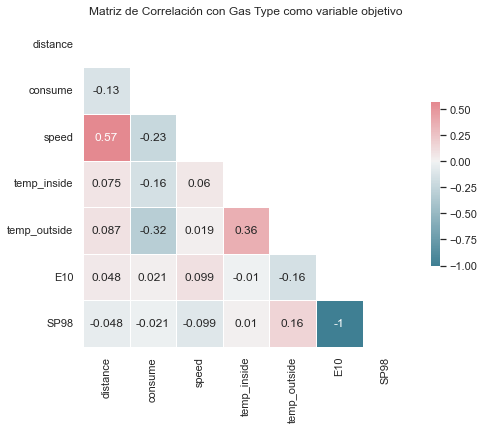

In [23]:
corr = df.corr()

# Crear el gráfico de correlación
sns.set(style="white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title("Matriz de Correlación con Gas Type como variable objetivo")
plt.show()

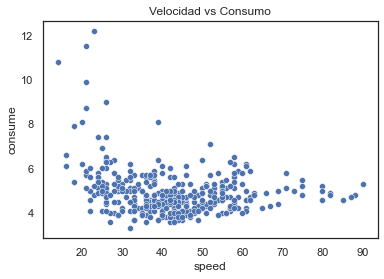

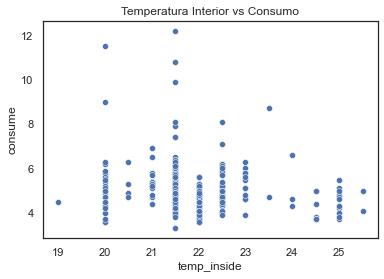

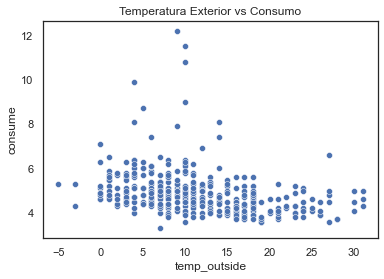

In [25]:
# Crear gráfico de dispersión para velocidad y consumo
sns.scatterplot(data=df, x="speed", y="consume")
plt.title("Velocidad vs Consumo")
plt.show()

# Crear gráfico de dispersión para temperatura interior y consumo
sns.scatterplot(data=df, x="temp_inside", y="consume")
plt.title("Temperatura Interior vs Consumo")
plt.show()

# Crear gráfico de dispersión para temperatura exterior y consumo
sns.scatterplot(data=df, x="temp_outside", y="consume")
plt.title("Temperatura Exterior vs Consumo")
plt.show()


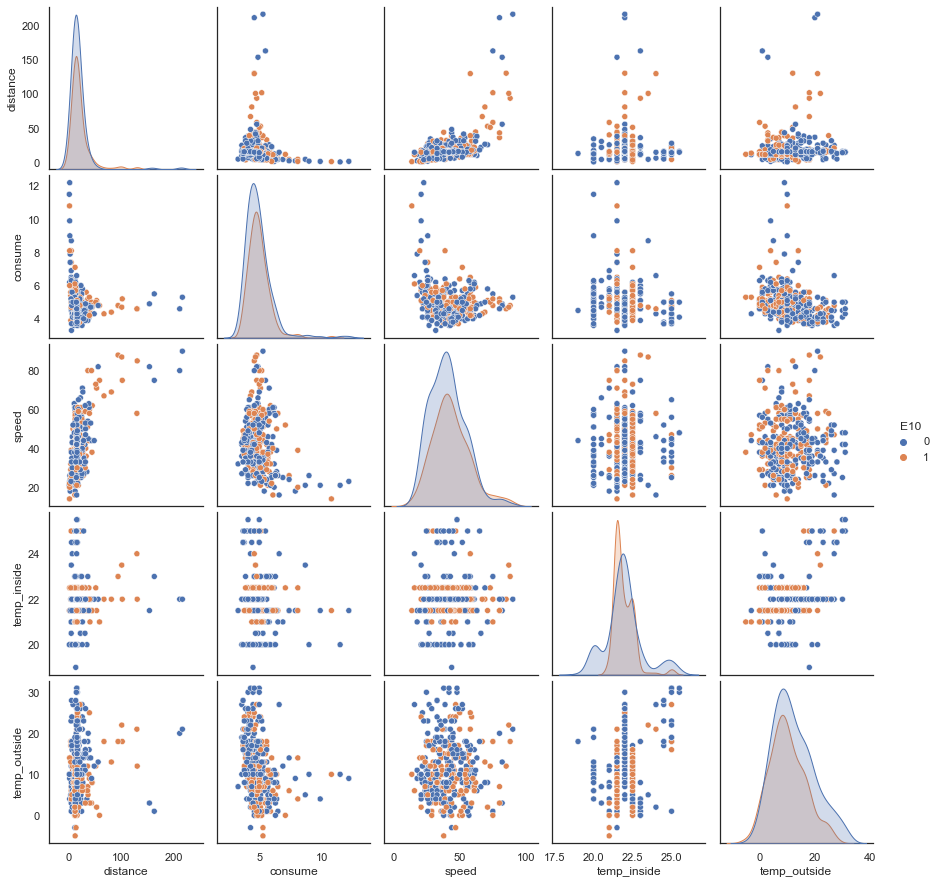

In [28]:
# Create pair plot
sns.pairplot(df, hue="E10", vars=["distance", "consume", "speed", "temp_inside", "temp_outside"]).

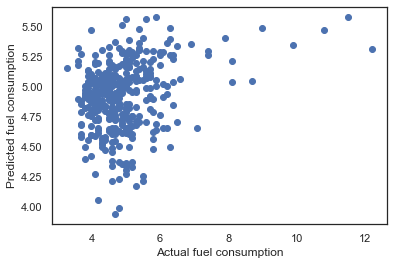

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Split data into training and testing sets
X_train = df[["distance", "speed", "temp_inside"]]
y_train = df["consume"]
X_test = df[["distance", "speed", "temp_inside"]]
y_test = df["consume"]

# Create and fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Create scatterplot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual fuel consumption")
plt.ylabel("Predicted fuel consumption")
plt.show()


[[209  10]
 [146  11]]


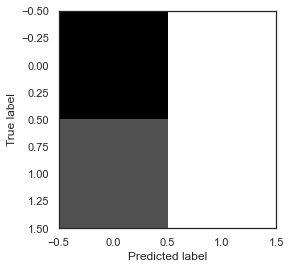

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


# Split data into training and testing sets
X_train = df[["distance", "speed"]]
y_train = df["E10"]
X_test = df[["distance", "speed"]]
y_test = df["E10"]

# Create and fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Create heatmap of confusion matrix
plt.imshow(cm, cmap="binary")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


In [38]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


# Compute metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 score: ", r2)


MSE:  0.4148936170212766
RMSE:  0.6441223618391746
R2 score:  -0.7059593403716957


The mean squared error (MSE) for the regression model is 0.4149, which means that, on average, the model's predicted fuel consumption values are off by 0.4149 units from the actual fuel consumption values. The root mean squared error (RMSE) is 0.6441, which is a measure of how well the model fits the data, and represents the standard deviation of the residuals.

The R-squared value is a measure of how much of the variance in the dependent variable (fuel consumption) can be explained by the independent variables (distance, speed, and temperature). In this case, the R-squared value is -0.7059, which means that only 29.41% of the variance in the dependent variable can be explained by the independent variables, and the model is not a good fit for the data.

Therefore, the regression model is not able to accurately predict fuel consumption based on distance, speed, and temperature, and the model's performance is poor. Further analysis and data exploration may be needed to determine what other factors may be affecting fuel consumption and how they can be incorporated into the model to improve its performance.

For the classification model, we can use metrics such as accuracy, precision, recall, and F1 score to evaluate the performance of the model. We would need to adjust the code to obtain these metrics and evaluate the model's performance.